# RSEI - AIR EMISSIONS CHANGE OVER TIME
If you want to use CSV files instead of the SBU database:
* access: https://gaftp.epa.gov/rsei/Current_Version/V2312_RY2022/Public_Release_Data/
* data dictionary: https://www.epa.gov/rsei/rsei-data-dictionary-elements-data

* download the RSEI data from https://gaftp.epa.gov/rsei/Current_Version/V2312_RY2022/Public_Release_Data/RSEIv2312_Public_Release_Data.zip
* and then upload to Colab here manually


Install code to use the SBU database

In [ ]:
%pip install ECHO_modules >&/dev/null;
%pip install geopandas >&/dev/null;
%pip install folium >&/dev/null;

Skip this cell if using the SBU database

In [ ]:
import zipfile
z = zipfile.ZipFile("/content/RSEIv2312_Public_Release_Data.zip") # May take some time to unzip
z.extractall("")

# Load RSEI data into notebook
RSEI data is separated into a few tables:
elements = this is where the hazard and risk scores are
submissions = the TRI submissions made by a facility. Each submission may include multiple releases.
releases = specific details about each release submitted
chemicals = details about the toxicity of each TRI chemical
Use the data dictionary to learn more about what each table contains:
https://www.epa.gov/rsei/rsei-data-dictionary-elements-data

From the SBU database

In [ ]:
from ECHO_modules.get_data import get_echo_data
import pandas

columns = '"ReleaseNumber", "PoundsPT", "ScoreCategory", "Score", "Population", "Hazard", "NCScore", "CScore"'
sql = f'select {columns} from "elements_data_rsei_v2312"'

rsei = get_echo_data(sql)
print("Read elements data")

sql = 'select * from "releases_data_rsei_v2312"'
releases = get_echo_data(sql)
print("Read releases data")

sql = 'select * from "submissions_data_rsei_v2312"'
submissions = get_echo_data(sql)

sql = 'select * from "facility_data_rsei_v2312"'
facs = get_echo_data(sql)
print("Read facilities data")

sql = 'select * from "chemical_data_rsei_v2312"'
chem = get_echo_data(sql)
print("Read chemicals data")

rsei

Read elements data


/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


Read releases data


/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')
/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (18,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


Read facilities data
Read chemicals data


,ReleaseNumber,PoundsPT,ScoreCategory,Score,Population,Hazard,NCScore,CScore
0,9324060,0.006018,7,0.931121,102228.000,3009.0000,0.000615,0.931121
1,9324060,0.003009,57,0.161609,8565.120,1504.5000,0.000107,0.161609
2,9324060,0.003009,107,0.076142,450.796,1504.5000,0.000050,0.076142
3,9324060,0.038964,10,0.000000,0.000,19482.0000,0.000000,0.000000
4,9324055,0.028907,7,0.013418,102228.000,43.3598,0.000000,0.000000
...,...,...,...,...,...,...,...,...
10569576,9976662,63.468700,7,0.000000,0.000,209.4470,0.000000,0.000000
10569577,9976662,31.734400,57,0.000086,0.000,104.7230,0.000086,0.000000
10569578,9976662,31.734400,107,0.000049,0.000,104.7230,0.000049,0.000000
10569579,9976662,248.063000,10,0.000000,0.000,818.6060,0.000000,0.000000


Skip this cell if using the SBU database

In [ ]:
import pandas
rsei = pandas.read_csv("/content/elements_data_rsei_v2312.csv",
                       usecols=["ReleaseNumber", "PoundsPT", "ScoreCategory",
                                "Score", "Population", "Hazard", "NCScore", "CScore"]) # Load in the CSV file
# Notice that we are not loading in all columns in the elements file, since it is a large one
# In the future, we may want to load in risk scores for specific age ranges. See data dictionary.
releases = pandas.read_csv("/content/releases_data_rsei_v2312.csv") # Load in the CSV file
submissions = pandas.read_csv("/content/submissions_data_rsei_v2312.csv") # Load in the CSV file
facs = pandas.read_csv("/content/facility_data_rsei_v2312.csv") # Load in the CSV File
chem = pandas.read_csv("/content/chemical_data_rsei_v2312.csv") # Load in the CSV file

rsei

<ipython-input-3-7090da7e0a02>:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  releases = pandas.read_csv("/content/releases_data_rsei_v2312.csv") # Load in the CSV file
<ipython-input-3-7090da7e0a02>:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pandas.read_csv("/content/submissions_data_rsei_v2312.csv") # Load in the CSV file
<ipython-input-3-7090da7e0a02>:9: DtypeWarning: Columns (18,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  facs = pandas.read_csv("/content/facility_data_rsei_v2312.csv") # Load in the CSV File


,ReleaseNumber,PoundsPT,ScoreCategory,Score,Population,NCScore,CScore,Hazard
0,243100,3355.0000,36,0.0,0.000000e+00,0.0,0.0,2348.5
1,243101,3950.0000,36,0.0,0.000000e+00,0.0,0.0,0.0
2,243103,735.0000,36,0.0,0.000000e+00,0.0,0.0,25725.0
3,243114,135284.0000,36,0.0,0.000000e+00,0.0,0.0,202926000.0
4,243115,7121.0000,36,0.0,0.000000e+00,0.0,0.0,10681500.0
...,...,...,...,...,...,...,...,...
10928315,9320950,10.7820,37,0.0,0.000000e+00,0.0,0.0,0.0
10928316,9320951,5.2130,7,0.0,1.660438e+06,0.0,0.0,0.0
10928317,9320951,2.6065,57,0.0,1.528230e+04,0.0,0.0,0.0
10928318,9320951,2.6065,107,0.0,8.043300e+02,0.0,0.0,0.0


In [ ]:
# Filter RSEI to submissions since 2001
# For our purposes, 2001 (start of Bush's first administration) is ok for a long-term analysis
submissions = submissions[submissions['SubmissionYear']>=2001][["SubmissionNumber", "ChemicalNumber", "SubmissionYear", "FacilityID"]]
# Below, we lookup each chemical in the chemicals table so that information is directly available in the submissions table
submissions = pandas.merge(submissions, chem[["ChemicalNumber", "Chemical"]], on="ChemicalNumber")
# Get facility IDs (FRS)
submissions = pandas.merge(submissions, facs[["FacilityID", 'FRSID']], on="FacilityID")
# Filter releases to land
# There are many categories that could fit here...
# We'll focus on those in the 400-500 range, underground injections and various landfilling
# Other categories include offsite transfers
# See the media_data_rsei CSV file
releases = releases[(releases["Media"] == 1) | (releases["Media"] == 2)]
# We merge the releases and submissions so that all the releases will have chemical names listed directly
compilation = pandas.merge(releases[["ReleaseNumber", "SubmissionNumber", "Media", "PoundsReleased"]], submissions, on="SubmissionNumber") # how="left"
# Finally, we add the releases information to the elements table, so that each "element"/risk score/hazard has its chemical name associated with it
final = pandas.merge(compilation[["ReleaseNumber", "SubmissionYear", "Chemical", "Media", "FacilityID", "FRSID"]], rsei, on="ReleaseNumber")
final

,ReleaseNumber,SubmissionYear,Chemical,Media,FacilityID,FRSID,PoundsPT,ScoreCategory,Score,Population,Hazard,NCScore,CScore
0,9977932,2020,Copper,2,72601PCNDS513HW,1.100005e+11,147.000,4,3.732700,1.178030e+05,220500.0,3.732700,0.0
1,9977933,2019,Copper,2,72601PCNDS513HW,1.100005e+11,148.960,4,3.787270,1.176680e+05,223440.0,3.787270,0.0
2,9977934,2021,Copper,2,4944WLLYRS2281P,1.100376e+11,38.720,4,0.629556,5.863160e+05,58080.0,0.629556,0.0
3,9977935,2020,Copper,2,4944WLLYRS2281P,1.100376e+11,89.280,4,1.448490,5.823170e+05,133920.0,1.448490,0.0
4,9977936,2020,Manganese,2,4944WLLYRS2281P,1.100376e+11,24.000,4,3.198980,5.823170e+05,288000.0,3.198980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029174,9238495,2022,Lead,2,5486WTDDSR17723,1.100555e+11,0.013,4,0.000836,9.014730e+04,299.0,0.000836,0.0
2029175,9238497,2022,Copper,2,76140MDLND4800E,1.100005e+11,18.860,4,3.432600,4.126154e+06,28290.0,3.432600,0.0
2029176,9238498,2022,Copper,1,76140MDLND4800E,1.100005e+11,105.250,2,20.279400,4.126154e+06,157875.0,20.279400,0.0
2029177,9238501,2022,Lead compounds,1,76140MDLND4800E,1.100005e+11,18.710,2,60.434600,4.126154e+06,430330.0,60.434600,0.0


# Indicators to measure and visualize

## Count of different substances reported each year

In [ ]:
final.groupby(by="SubmissionYear")[["Chemical"]].nunique()

,Chemical
SubmissionYear,
2001,443
2002,433
2003,437
2004,437
2005,438
2006,441
2007,434
2008,430
2009,422


## Most commonly reported substances and total amounts of those reported + risk score

In [ ]:
mostcommon = final.groupby(by="Chemical")[["ReleaseNumber", "FacilityID", "PoundsPT", "Score"]].agg(
    {"ReleaseNumber":"nunique", "FacilityID":"nunique", "PoundsPT":"sum", "Score": "sum"}
    ).astype(int).sort_values(by="ReleaseNumber", ascending=False).head(50)
mostcommon.to_csv("results/mostcommon.csv")
mostcommon

## Total pounds of releases 2001-2022


<Axes: xlabel='SubmissionYear'>

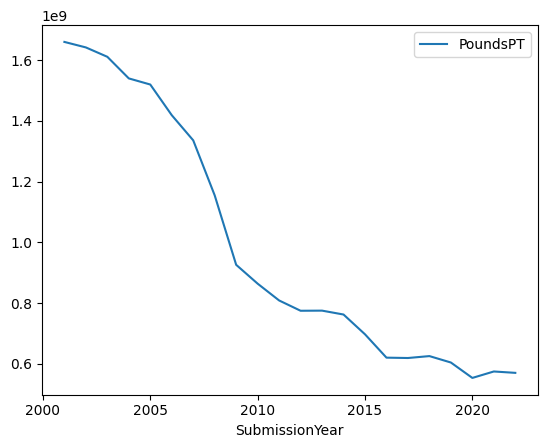

In [ ]:
final.groupby(by="SubmissionYear")[["PoundsPT"]].sum().astype(int).plot()

# Total Risk Score 2001-2022

<Axes: xlabel='SubmissionYear'>

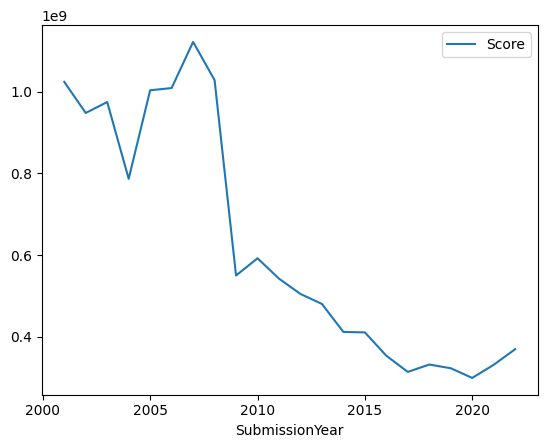

In [ ]:
final.groupby(by="SubmissionYear")[["Score"]].sum().astype(int).plot()

## What explains the big drop off in 2008-2009?

In [ ]:
# Find the chemicals, industries, etc. with the biggest drops 2008-2009
final08 = final[final["SubmissionYear"]==2008].groupby(by=["Chemical"])[["PoundsPT", "Score"]].sum()
final09 = final[final["SubmissionYear"]==2009].groupby(by=["Chemical"])[["PoundsPT", "Score"]].sum()
pct_chg = ((final09-final08)/final08) * 100
pct_chg.sort_values(by="Score", ascending=True).head(50)
raw_chg = final09-final08
raw_chg.sort_values(by="Score", ascending=True).head(50)

,PoundsPT,Score
Chemical,,
Chromium,-5.568527e+05,-3.968485e+08
Ethylene oxide,-5.931114e+04,-3.524452e+07
Cobalt compounds,-9.454194e+03,-1.626691e+07
Cobalt,-4.715326e+03,-1.367579e+07
Nickel compounds,-1.316222e+05,-6.611082e+06
Nickel,-3.931742e+04,-3.655905e+06
Chloroprene,-1.008958e+05,-3.188915e+06
Trichloroethylene,-1.014076e+06,-1.558230e+06
Polycyclic aromatic compounds,-9.344573e+04,-1.275683e+06


In [ ]:
# Were these lasting drops? Compare 2004-2008 with 2017-2021 levels
final08 = final[final["SubmissionYear"].isin([2004,2005,2006,2007,2008])].groupby(by=["Chemical"])[["PoundsPT", "Score"]].sum()
final22 = final[final["SubmissionYear"].isin([2017,2018,2019,2020,2021])].groupby(by=["Chemical"])[["PoundsPT", "Score"]].sum()
raw_chg = final09-final22
raw_chg.sort_values(by="Score", ascending=True).head(50)

,PoundsPT,Score
Chemical,,
Ethylene oxide,-6.413508e+05,-2.594448e+08
"Chromium compounds (except for chromite ore mined in the Transvaal Region of South Africa and the unreacted ore component of the chromite ore processing residue (COPR). COPR is the solid waste remaining after aqueous extraction of oxidized chromite ore that has been combined with soda ash and kiln roasted at approximately 2,000 F.)",-5.059438e+05,-1.528807e+08
Chromium,-3.552838e+05,-1.482534e+08
Cobalt compounds,-1.093072e+05,-9.538832e+07
Asbestos (friable),-6.246300e+03,-6.406341e+07
Cobalt,-2.756888e+04,-5.293273e+07
Nickel compounds,-6.005881e+05,-3.464159e+07
Nickel,-5.499730e+05,-3.389909e+07
Diisocyanates,-8.053748e+05,-3.095442e+07


## Which facilities increased releases during the first Trump administration?
Negative values here actually represent increases from Obama to Trump because of the way the calculations are done.


In [ ]:
final["SubmissionYear"] = pandas.to_datetime(final["SubmissionYear"], format='%Y')#.dt.strftime('%Y')

obama = final[(final["SubmissionYear"]>="2013") & (final["SubmissionYear"]<"2017")]
obama = obama.groupby(by=["FacilityID"])[["PoundsPT", "Score"]].sum().reset_index()

trump = final[(final["SubmissionYear"]>="2017") & (final["SubmissionYear"]<"2021")]
trump = trump.groupby(by=["FacilityID"])[["PoundsPT", "Score"]].sum().reset_index()

joined = pandas.merge(obama, trump, on="FacilityID", how="left", suffixes=["_obama", "_trump"])
joined["pounds diff"] = joined["PoundsPT_obama"] - joined["PoundsPT_trump"]
joined["score diff"] = joined["Score_obama"] - joined["Score_trump"]

morepounds = joined[joined["pounds diff"]<0]
morepounds.to_csv("results/facs_with_morepounds.csv")
morepounds.sort_values(by="pounds diff", ascending=True).head(50)

,FacilityID,PoundsPT_obama,Score_obama,PoundsPT_trump,Score_trump,pounds diff,score diff
8315,45620MRCNL7397N,4.330047e+06,287273.961349,1.948818e+07,305103.000388,-1.515813e+07,-17829.039039
16423,84074MXMGNROWLE,1.811301e+07,43236.628731,2.778608e+07,97086.051045,-9.673064e+06,-53849.422314
11456,58523NTLPV294CO,5.800567e+07,3476.621587,6.732796e+07,6657.536513,-9.322296e+06,-3180.914926
10044,51054TRRNTPORTN,3.021943e+06,72.059122,1.099662e+07,18125.065549,-7.974676e+06,-18053.006427
13570,7076WFLPMN2679H,3.994627e+06,55880.293619,1.146264e+07,243798.198200,-7.468009e+06,-187917.904581
13392,70346CFNDSHWY30,2.843585e+07,59851.784806,3.473777e+07,70037.011643,-6.301925e+06,-10185.226837
14291,74764WYRHSHIGHW,1.580600e+07,22683.530298,2.135682e+07,24458.962789,-5.550824e+06,-1775.432491
14096,73701FRMLN1MILE,1.129704e+07,80491.108962,1.648355e+07,997.278420,-5.186513e+06,79493.830541
7207,42350WLSNSHWY85,2.663377e+05,2039.681943,5.139080e+06,8863.020750,-4.872743e+06,-6823.338808
13554,7073WMTHNX4171H,5.651304e+05,34.409041,4.757052e+06,339.491540,-4.191921e+06,-305.082499


## Which facilities increased their risk (Score) during Trump 1?
Negative values here actually represent increases from Obama to Trump because of the way the calculations are done.

In [ ]:
increases = joined[joined["score diff"]<0]
increases.to_csv("results/facs_with_morerisk.csv")
increases.sort_values(by="score diff", ascending=True).head(50)

,FacilityID,PoundsPT_obama,Score_obama,PoundsPT_trump,Score_trump,pounds diff,score diff
5859,35898SDDSRBUILD,3.342000e+03,4.616690e+03,1.589600e+04,3.849877e+07,-12554.000000,-3.849416e+07
15086,7703WFTRPP11811,4.249400e+04,6.614237e+04,3.842300e+04,1.708544e+07,4071.000000,-1.701930e+07
8150,45212THSHP4900B,9.065600e+02,2.459003e+06,2.917802e+03,1.436362e+07,-2011.242000,-1.190462e+07
7583,44035NGLHR120PI,8.325000e+03,1.566124e+06,2.866352e+04,9.627316e+06,-20338.520000,-8.061192e+06
15363,77507QSTRC5761U,2.632930e+05,5.795847e+07,1.876700e+05,6.591277e+07,75623.000000,-7.954300e+06
15043,7701WLGNLT111LU,1.376400e+02,1.203386e+05,3.673000e+03,7.014539e+06,-3535.360000,-6.894200e+06
16380,84006KNNCT8362W,4.139760e+05,6.227494e+06,4.396700e+05,1.235910e+07,-25693.999988,-6.131610e+06
7493,43616SHLCM4001C,8.310733e+05,1.297782e+05,8.104385e+05,5.556146e+06,20634.800276,-5.426368e+06
15013,77008GDMNM33W11,1.260000e+03,2.652066e+05,2.250000e+03,5.499895e+06,-990.000000,-5.234688e+06
14154,74063CHMLN9100W,1.047506e+05,3.934564e+04,1.212564e+05,4.968676e+06,-16505.868200,-4.929330e+06


## Which facilities/industries increased risk while decreasing pounds?
Meaning that while they released less, their releases were more toxic or exposed more people.


In [ ]:
intense = joined[(joined["pounds diff"]>0) & (joined["score diff"]<0)]
intense = facs[facs["FacilityID"].isin(list(intense["FacilityID"].unique()))]
intense.to_csv("results/industries_with_facs_with_morerisk_fewerpounds.csv")
intense.groupby(by=["NAICS1"])[["FacilityID"]].nunique().sort_values(by="FacilityID",ascending=False)

,FacilityID
NAICS1,
325199.0,58
325510.0,54
325211.0,51
221112.0,39
424710.0,35
...,...
337214.0,1
337121.0,1
339920.0,1


## Where are the facilities reporting greater risks?


In [ ]:
increases = facs[facs["FacilityID"].isin(list(increases["FacilityID"].unique()))]

import geopandas
import folium
from folium.plugins import FastMarkerCluster

increases = geopandas.GeoDataFrame(
    increases, geometry=geopandas.points_from_xy(increases['Longitude'],
                                                 increases['Latitude'],
                                                 crs=4269))

increases.to_csv("results/facs_with_morerisk_mappable.csv")

m = folium.Map()

FastMarkerCluster(data=list(zip(list(increases['Latitude']), list(increases['Longitude'])))).add_to(m)

m

## Which industries are these risk-increasing facilities a part of?


In [ ]:
increases.to_csv("results/industries_with_facs_with_morerisk.csv")
increases.groupby(by=['NAICS1'])[["FacilityID"]].nunique().sort_values(by="FacilityID",ascending=False)

,FacilityID
NAICS1,
327320.0,576
325199.0,199
424710.0,195
326199.0,185
325510.0,162
...,...
339993.0,1
212111.0,1
923140.0,1


## Releases (measured in pounds) of which specific toxics actually increased during the Trump administration?


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## First, create year to year change for each chemical
final["SubmissionYear"] = pandas.to_datetime(final["SubmissionYear"], format='%Y')#.dt.strftime('%Y')
grouped = final.groupby(by=["SubmissionYear", "Chemical"])[["PoundsPT"]].sum().reset_index()

results = {}
for c in list(grouped["Chemical"].unique()):
  this_c = grouped[grouped["Chemical"]==c]
  this_c.set_index("SubmissionYear", inplace=True)
  result = this_c[["PoundsPT"]].join(this_c["PoundsPT"].pct_change(4, freq=pandas.DateOffset(years=1))*100, rsuffix="_4YearMovingChange")
  avg = this_c[["PoundsPT"]].rolling("1460D").mean() # Issues with leap years?
  result = result.join(avg, rsuffix="_4YearRollingAverage")
  """
  ## Now filter to where 2019 / 2020 are positive, representing increase 2016-2019, 2017-2020
  if ("2019" in result.index):
    if (result.at["2019", "PoundsPT_4YearMovingChange"]>0):
      results[c]["2019"] = result
  if ("2020" in result.index):
    if (result.at["2020", "PoundsPT_4YearMovingChange"]>0):
      results[c]["2020"] = result
  """
  ## Now filter to where the 4 year rolling average of (2013, 2014, 2015, 2016) < (2017, 2018, 2019, 2020)
  if ("2020" in result.index) & ("2016" in result.index):
    if (result.at["2020", "PoundsPT_4YearRollingAverage"] > result.at["2016", "PoundsPT_4YearRollingAverage"]):
      results[c] = result

for i, c in enumerate(list(results.keys())):
  print(i, c)

0 1,1,1,2-Tetrachloroethane
1 1,1,2,2-Tetrachloroethane
2 1,1,2-Trichloroethane
3 1,1-Dimethylhydrazine
4 1,2,4-Trichlorobenzene
5 1,2-Dichloro-1,1,2-trifluoroethane (HCFC-123a)
6 1,2-Dichloro-1,1-difluoroethane (HCFC-132b)
7 1,2-Dichloroethane
8 1,3-Dichlorobenzene (m-Dichlorobenzene)
9 1,4-Dichloro-2-butene
10 1,4-Dichlorobenzene (p-Dichlorobenzene)
11 1-Chloro-1,1-difluoroethane (HCFC-142b)
12 2,3-Dichloropropene
13 2,4,5-Trichlorophenol
14 2,4,6-Trichlorophenol
15 2,4-D
16 2,4-D 2-ethylhexyl ester
17 2,4-Diaminotoluene (2,4-Toluenediamine)
18 2,4-Dinitrotoluene
19 2-Methylpyridine
20 3,3'-Dimethylbenzidine
21 4,4'-Methylenedianiline
22 4,6-Dinitro-o-cresol
23 Acetamide
24 Acetonitrile
25 Acetophenone
26 Acifluorfen, sodium salt 
27 Acrolein
28 Acrylamide
29 Aldicarb
30 Allylamine
31 Amitrole
32 Ammonia (includes anhydrous ammonia and aqueous ammonia from water dissociable ammonium salts and other sources; 10 percent of total aqueous ammonia is reportable under this listing)
33 Anth

## How many of the toxics that increased are carcinogens?


In [ ]:
increased = list(results.keys())
increased.sort()
increased = chem[chem["Chemical"].isin(increased)]
increased.to_csv("results/chems_with_morepounds.csv")
increased[increased["ToxicityCategory"]=="Carcinogen"] # (57/167 = > 1/3)
counts = increased.groupby("ToxicityCategory").size().reset_index(name="Count")
counts["Percent"] = (counts["Count"] / counts["Count"].sum()) * 100
counts["Percent"] = counts["Percent"].map(lambda x: f"{x:.1f}%")
counts

,ToxicityCategory,Count,Percent
0,Carcinogen,57,42.5%
1,Mixed,11,8.2%
2,Non-carcinogen,66,49.3%


## Releases (measured in terms of risk/Score) of which specific chemicals actually increased during the first Trump admin?
This would be due to either increases in pounds released (see above) or because more of them were released in places where they expose more people.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## First, create year to year change for each chemical
final["SubmissionYear"] = pandas.to_datetime(final["SubmissionYear"], format='%Y')#.dt.strftime('%Y')
grouped = final.groupby(by=["SubmissionYear", "Chemical"])[["Score"]].sum().reset_index()

results = {}
for c in list(grouped["Chemical"].unique()):
  this_c = grouped[grouped["Chemical"]==c]
  this_c.set_index("SubmissionYear", inplace=True)
  result = this_c[["Score"]].join(this_c["Score"].pct_change(4, freq=pandas.DateOffset(years=1))*100, rsuffix="_4YearMovingChange")
  avg = this_c[["Score"]].rolling("1460D").mean() # Issues with leap years?
  result = result.join(avg, rsuffix="_4YearRollingAverage")
  """
  ## Now filter to where 2019 / 2020 are positive, representing increase 2016-2019, 2017-2020
  if ("2019" in result.index):
    if (result.at["2019", "Score_4YearMovingChange"]>0):
      results[c]["2019"] = result
  if ("2020" in result.index):
    if (result.at["2020", "Score_4YearMovingChange"]>0):
      results[c]["2020"] = result
  """
  ## Now filter to where the 4 year rolling average of (2013, 2014, 2015, 2016) < (2017, 2018, 2019, 2020)
  if ("2020" in result.index) & ("2016" in result.index):
    if (result.at["2020", "Score_4YearRollingAverage"] > result.at["2016", "Score_4YearRollingAverage"]):
      results[c] = result

for i, c in enumerate(list(results.keys())):
  print(i, c)

0 1,1,1,2-Tetrachloroethane
1 1,1,2,2-Tetrachloroethane
2 1,1,2-Trichloroethane
3 1,2,4-Trichlorobenzene
4 1,2-Butylene oxide
5 1,2-Dichloroethane
6 1,2-Dichloroethylene
7 1,4-Dichloro-2-butene
8 1-Chloro-1,1-difluoroethane (HCFC-142b)
9 2,4,5-Trichlorophenol
10 2,4,6-Trichlorophenol
11 2,4-D 2-ethylhexyl ester
12 2,4-Diaminotoluene (2,4-Toluenediamine)
13 3,3'-Dimethylbenzidine
14 4,4'-Isopropylidenediphenol
15 4,4'-Methylenedianiline
16 4,6-Dinitro-o-cresol
17 5-Nitro-o-toluidine (2-Methyl-5-nitroaniline)
18 Acetamide
19 Acetonitrile
20 Acrolein
21 Acrylamide
22 Aldicarb
23 Aluminum (fume or dust)
24 Amitrole
25 Anthracene
26 Antimony
27 Arsenic compounds
28 Asbestos (friable)
29 Benzoic trichloride (Benzotrichloride)
30 Beryllium
31 Biphenyl
32 Bis(2-chloro-1-methylethyl) ether
33 Boron trichloride
34 Boron trifluoride
35 Bromomethane (Methyl bromide)
36 Carbon tetrachloride
37 Carboxin
38 Chlorimuron-ethyl
39 Chloroacetic acid
40 Chlorobenzene
41 Chlorophenols
42 Cumene
43 Cyclohex

## How many of the toxics whose risks increased are carcinogens?

In [ ]:
increased = list(results.keys())
increased.sort()
increased = chem[chem["Chemical"].isin(increased)]
increased.to_csv("results/chems_with_morerisk.csv")
increased[increased["ToxicityCategory"]=="Carcinogen"] # (50/133 = > 1/3)
counts = increased.groupby("ToxicityCategory").size().reset_index(name="Count")
counts["Percent"] = (counts["Count"] / counts["Count"].sum()) * 100
counts["Percent"] = counts["Percent"].map(lambda x: f"{x:.1f}%")
counts

,ToxicityCategory,Count,Percent
0,Carcinogen,50,37.3%
1,Mixed,13,9.7%
2,Non-carcinogen,71,53.0%


## Which carcinogenic toxics increased the most?

In [ ]:
increased = list(results.keys())
increased.sort()
# increased.sort(lambda element: element[])
increased = chem[chem["Chemical"].isin(increased)]
increased.to_csv("results/chems_with_morerisk.csv")
increased[increased["ToxicityCategory"]=="Carcinogen"] # (50/133 = > 1/3)

,CASNumber,CASStandard,ChemicalNumber,TRIChemID,MetalCombinedChemNum,SortCAS,SortNameKey,Chemical,FirstReportingYear,ToxicitySource,...,PBTFlag,TSCAFlag,PFASFlag,Metal,HasTox,MaxTW,MaxNC,MaxC,Notes,Temp
3,60355,60-35-5,4,0000060355,4,60355,400,Acetamide,1987,"CalEPA 7/2001, OPP 11/2003",...,f,f,f,0,t,7100.0,0.0,7100,NaN,NaN
9,79061,79-06-1,10,0000079061,10,79061,1100,Acrylamide,1987,IRIS 5/2011,...,f,f,f,0,t,500000.0,580.0,500000,NaN,NaN
27,61825,61-82-5,28,0000061825,28,61825,3100,Amitrole,1994,OPP 7/2009,...,f,f,f,0,t,680000.0,0.0,680000,NaN,NaN
39,N020,N020,40,N020,39,20,4400,Arsenic compounds,1987,"IRIS 6/2000, CalEPA 7/2009",...,f,t,f,2,t,15000000.0,230000.0,15000000,NaN,NaN
40,1332214,1332-21-4,41,0001332214,41,1332214,4500,Asbestos (friable),1987,IRIS 4/1997,...,f,t,f,3,t,170000000.0,0.0,170000000,Toxicity information for this chemical is expr...,NaN
52,98077,98-07-7,53,0000098077,53,98077,5700,Benzoic trichloride (Benzotrichloride),1987,IRIS 4/1997,...,f,f,f,0,t,13000000.0,0.0,13000000,NaN,NaN
59,92524,92-52-4,60,0000092524,60,92524,6400,Biphenyl,1987,IRIS 7/2014,...,f,f,f,0,t,800.0,2.0,800,NaN,NaN
63,542881,542-88-1,64,0000542881,64,542881,6800,Bis(chloromethyl) ether,1987,IRIS 4/1997,...,f,f,f,0,t,220000000.0,0.0,220000000,NaN,NaN
113,56235,56-23-5,115,0000056235,115,56235,11800,Carbon tetrachloride,1987,IRIS 5/2011,...,f,t,f,0,t,70000.0,250.0,70000,NaN,NaN
134,510156,510-15-6,136,0000510156,136,510156,13400,Chlorobenzilate,1987,"IRIS 4/1997, HEAST 7/1997",...,f,f,f,0,t,280000.0,50.0,280000,NaN,NaN
